In [243]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

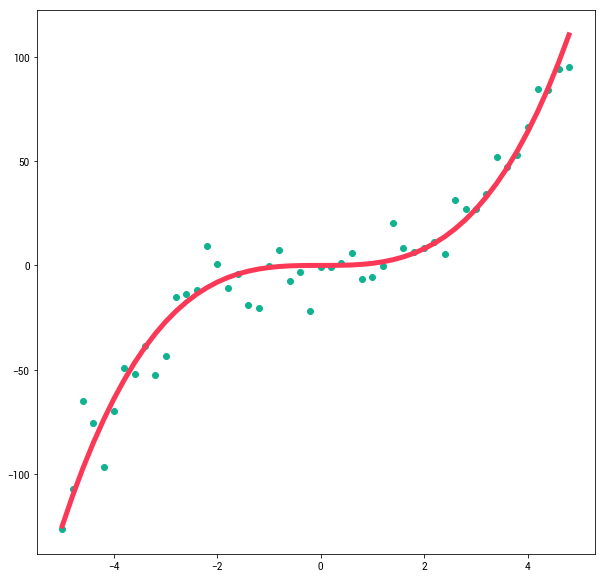

In [330]:
#Generating plots for LR examples section 1
import pylab
x = np.arange(-5,5, 0.2)
y = [i**3 + np.random.normal()*10 for i in x]
plt.figure(figsize = (10,10))
plt.scatter(x = x, y = y, color = col[2])
pylab.plot(x, x**3 , color = col[4], lw = 5)
#plt.ylim([-1, 5])
plt.show()

#### Load the country GDP and Education spend dataset

In [37]:
gdp_df  = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gdp.csv', header = 2)
gov_exp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gov_exp.csv', header = 2)

#### Only get 2013 data, merge the data in one data frame. Drop all countries that have missing data

In [187]:
merged_df = gov_exp_df[['Country Name', '2013']].merge(gdp_df[['Country Name', '2013']], on = 'Country Name').dropna() #get only 2013, merge and drop
merged_df = merged_df.set_index('Country Name')#Set dataframe index to countries
merged_df.columns = ['Spending on Education(%)', 'GDP Growth (%)'] #Set proper column titles

#### Get Distribution of Education Spend %

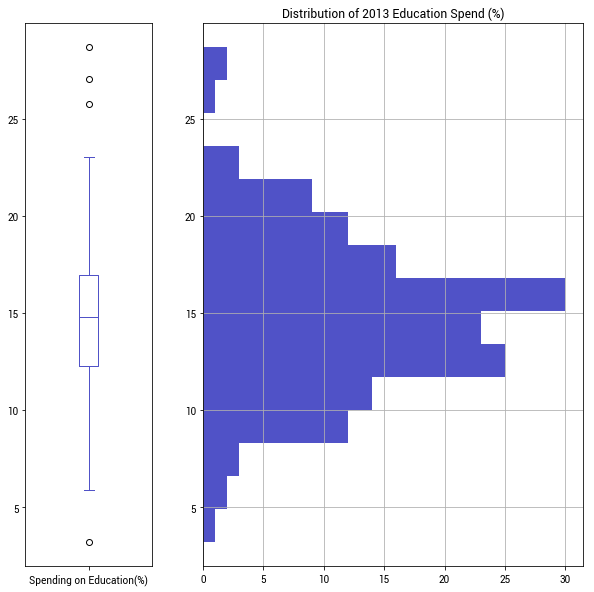

In [249]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 0].hist(color = col[0], ax = ax[1], orientation='horizontal', bins = 15) #plot histogram
merged_df.iloc[:, 0].plot(kind = 'box', ax = ax[0], color = col[0]) #plot boxplot
plt.title('Distribution of 2013 Education Spend (%)') #set title
plt.show()

#### Get Distribution of GDP Growth (%)

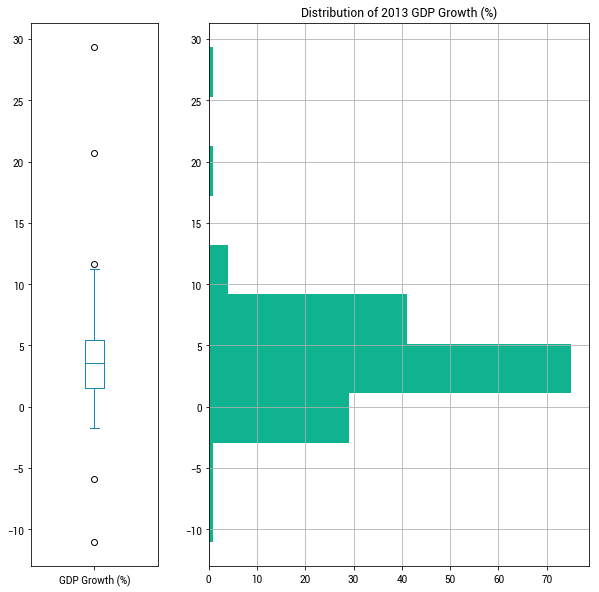

In [250]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 1].hist(color = col[2], ax = ax[1], orientation='horizontal', bins = 10)  #plot histogram
merged_df.iloc[:, 1].plot(kind = 'box', ax = ax[0], color = col[1]) #plot boxplot
plt.title('Distribution of 2013 GDP Growth (%)') #set title
plt.show()

#### Plot scatter plot of GDP and Education Spend

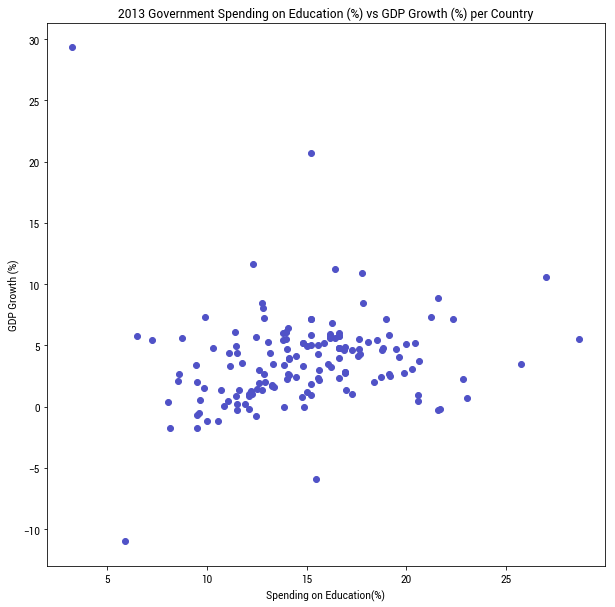

In [290]:
plt.figure(figsize = (10,10))
plt.scatter(x = merged_df['Spending on Education(%)'], y = merged_df['GDP Growth (%)'], color = col[0])
plt.xlabel(merged_df.columns[0])
plt.ylabel(merged_df.columns[1])
plt.title('2013 Government Spending on Education (%) vs GDP Growth (%) per Country')
plt.show()

In [325]:
merged_df.corr() #Get correlation

,Spending on Education(%),GDP Growth (%)
Spending on Education(%),1.000000,0.115427
GDP Growth (%),0.115427,1.000000


#### Fit our Ordinary Least Squares (OLS) Regression Model with our data
Note that we transform our X to allow for a constant variable

In [331]:
model = sm.OLS(merged_df['GDP Growth (%)'], sm.add_constant(merged_df['Spending on Education(%)'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.039
Date:                Tue, 21 Aug 2018   Prob (F-statistic):              0.155
Time:                        23:44:13   Log-Likelihood:                -423.40
No. Observations:                 153   AIC:                             850.8
Df Residuals:                     151   BIC:                             856.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.1240      1.198      1.773      0.078      -0.243       4.491
Spending on Education(%)     0.1109      0.078      1.428      0.155      -0.043       0.264
==============================================================================
Omnibus:                      116.274   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1946.343
Skew:                           2.436   Prob(JB):                         0.00
Kurtosis:                      19.780   Cond. No.                         59.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot the resulting fitted line with our actual data

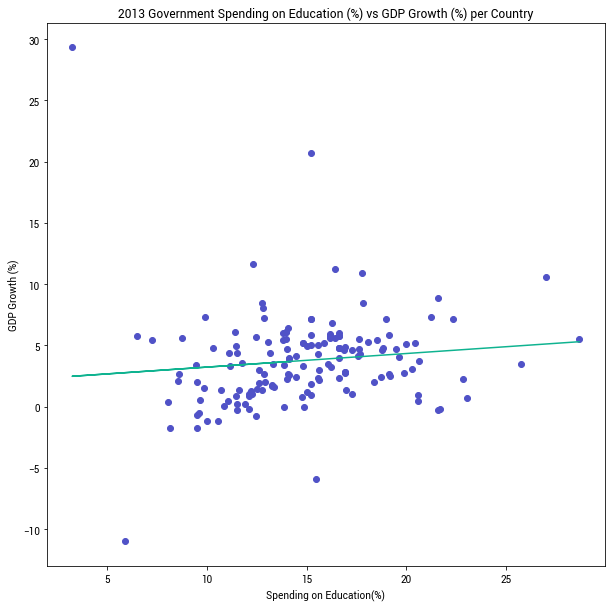

In [294]:
const = model.params['const']
beta = model.params['Spending on Education(%)']
plt.figure(figsize = (10,10))
plt.scatter(x = merged_df['Spending on Education(%)'], y = merged_df['GDP Growth (%)'], color = col[0])
plt.xlabel(merged_df.columns[0])
plt.ylabel(merged_df.columns[1])
plt.title('2013 Government Spending on Education (%) vs GDP Growth (%) per Country')
pylab.plot(merged_df['Spending on Education(%)'], const + beta*merged_df['Spending on Education(%)'], color = col[2])
plt.show()


#### Compare result with standardized values

In [324]:
meansd = {'mean': merged_df.mean(), 'sd':  merged_df.std()}

std_merge = merged_df.copy()
std_merge['Spending on Education(%)'] = (merged_df['Spending on Education(%)'] - meansd['mean']['Spending on Education(%)'])/meansd['sd']['Spending on Education(%)']
std_merge['GDP Growth (%)'] = (merged_df['GDP Growth (%)'] - meansd['mean']['GDP Growth (%)'])/meansd['sd']['GDP Growth (%)']

model2 = sm.OLS(std_merge['GDP Growth (%)'], sm.add_constant(std_merge['Spending on Education(%)'])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.039
Date:                Tue, 21 Aug 2018   Prob (F-statistic):              0.155
Time:                        22:14:19   Log-Likelihood:                -215.57
No. Observations:                 153   AIC:                             435.1
Df Residuals:                     151   BIC:                             441.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.179e-17      0.081    2.7e-16      1.000      -0.159       0.159
Spending on Education(%)     0.1154      0.081      1.428      0.155      -0.044       0.275
==============================================================================
Omnibus:                      116.274   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1946.343
Skew:                           2.436   Prob(JB):                         0.00
Kurtosis:                      19.780   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking Model Assumptions

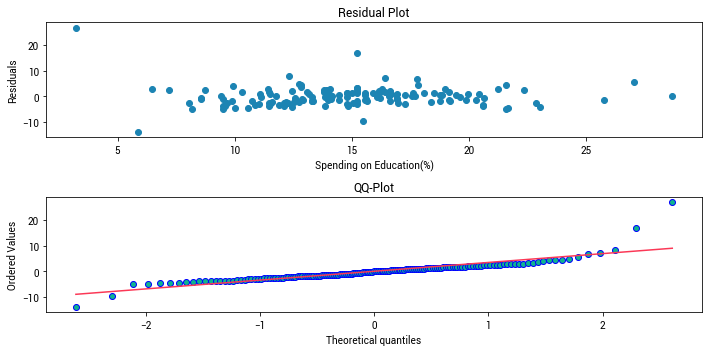

In [376]:
fig, ax = plt.subplots(2, 1, figsize = (10, 5))
residuals = merged_df['GDP Growth (%)'].values - model.predict() #Calculate residuals

# Make residual plot
ax[0].scatter(x = merged_df['Spending on Education(%)'], y= residuals , color = col[1])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Spending on Education(%)')
ax[0].set_ylabel('Residuals')

#Make QQ Plot
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

In [385]:
co2_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/co2.csv', header = 2)
exports_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/exports.csv', header = 2)

In [405]:
merge3_df = co2_df[['Country Name', '2013']].merge(exports_df[['Country Name', '2013']], on = 'Country Name').dropna()
merge3_df = merge3_df.set_index('Country Name')
merge3_df.columns = ['CO2 Emissions', 'Exports']

merge4_df = merge3_df.merge(merged_df, left_index = True, right_index = True).dropna()

model4 = sm.OLS(merge4_df['GDP Growth (%)'], sm.add_constant(merge4_df[['CO2 Emissions','Exports']])).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.259
Date:                Wed, 22 Aug 2018   Prob (F-statistic):             0.0159
Time:                        00:26:08   Log-Likelihood:                -407.55
No. Observations:                 148   AIC:                             821.1
Df Residuals:                     145   BIC:                             830.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5910      0.554      8.290      0.000       3.496       5.685
CO2 Emissions    -0.1860      0.066     -2.799      0.006      -0.317      -0.055
Exports           0.0014      0.011      0.131      0.896      -0.020       0.023
==============================================================================
Omnibus:                       95.778   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.772
Skew:                           1.960   Prob(JB):                    9.69e-293
Kurtosis:                      17.237   Cond. No.                         91.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""